In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
import numpy as np
import cv2

In [4]:
import os

In [5]:
import imgaug as ia
# import imgaug.

In [6]:
import json

## Data Exploration

In [230]:
data_dir = "za_traffic_2020/"
train_dir = "traffic_train"
test_dir = "traffic_public_test"
image_dir = "images"
json_path = "za_traffic_2020/traffic_train/train_traffic_sign_dataset.json"
json_train_path = "za_traffic_2020/traffic_train/train_traffic_sign.json"
json_test_path = "za_traffic_2020/traffic_train/test_traffic_sign.json"

## Data Visualization

In [8]:
def load_image_paths(data_dir, task_dir=train_dir, image_dir=image_dir):
    task_dir = os.path.join(data_dir, task_dir)
    image_dir = os.path.join(task_dir, image_dir)
    image_paths = []
    
    for i in os.listdir(image_dir):
        image_path = os.path.join(image_dir, i)
        image_paths.append(image_path)
    
    return image_paths

In [9]:
image_paths = load_image_paths(data_dir)

In [10]:
len(image_paths)

4500

In [23]:
def random_visualize(image_paths:list, image_id=None):
    if image_id:
        idx = image_id
    else:
        idx = np.random.randint(0, len(image_paths), 1)[0]
    image_path = image_paths[idx]
    image = cv2.imread(image_path)
    image = image[..., ::-1]
    plt.imshow(image)

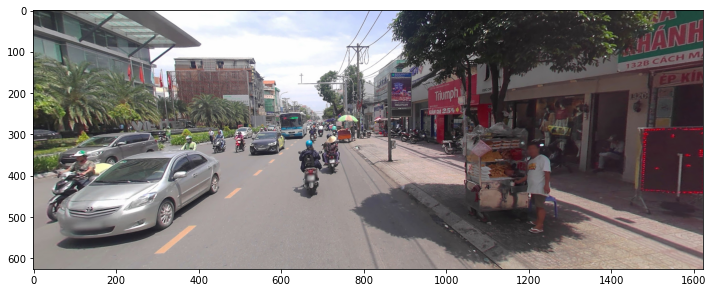

In [12]:
random_visualize(image_paths)

In [13]:
with open(json_path) as f:
    annotation = json.load(f)
    
annotation.keys()

dict_keys(['info', 'images', 'annotations', 'categories'])

In [14]:
def get_info_annotation(annotation, key="annotations"):
    return annotation[key]

In [15]:
(get_info_annotation(annotation))

[{'segmentation': [],
  'area': 342,
  'iscrowd': 0,
  'image_id': 3,
  'bbox': [880, 333, 19, 18],
  'category_id': 2,
  'id': 0},
 {'segmentation': [],
  'area': 6889,
  'iscrowd': 0,
  'image_id': 5,
  'bbox': [1069, 355, 83, 83],
  'category_id': 3,
  'id': 1},
 {'segmentation': [],
  'area': 63,
  'iscrowd': 0,
  'image_id': 5,
  'bbox': [768, 480, 9, 7],
  'category_id': 2,
  'id': 2},
 {'segmentation': [],
  'area': 255,
  'iscrowd': 0,
  'image_id': 6,
  'bbox': [781, 337, 17, 15],
  'category_id': 6,
  'id': 3},
 {'segmentation': [],
  'area': 56,
  'iscrowd': 0,
  'image_id': 16,
  'bbox': [733, 352, 7, 8],
  'category_id': 2,
  'id': 4},
 {'segmentation': [],
  'area': 5400,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [1024, 160, 75, 72],
  'category_id': 2,
  'id': 5},
 {'segmentation': [],
  'area': 1927,
  'iscrowd': 0,
  'image_id': 18,
  'bbox': [1138, 295, 47, 41],
  'category_id': 2,
  'id': 6},
 {'segmentation': [],
  'area': 99,
  'iscrowd': 0,
  'image_id': 18,
  '

In [16]:
get_info_annotation(annotation, key="images")

[{'file_name': '3.png', 'height': 626, 'width': 1622, 'id': 3, 'street_id': 3},
 {'file_name': '5.png', 'height': 626, 'width': 1622, 'id': 5, 'street_id': 4},
 {'file_name': '6.png', 'height': 626, 'width': 1622, 'id': 6, 'street_id': 5},
 {'file_name': '16.png',
  'height': 626,
  'width': 1622,
  'id': 16,
  'street_id': 3},
 {'file_name': '17.png',
  'height': 626,
  'width': 1622,
  'id': 17,
  'street_id': 8},
 {'file_name': '18.png',
  'height': 626,
  'width': 1622,
  'id': 18,
  'street_id': 3},
 {'file_name': '21.png',
  'height': 626,
  'width': 1622,
  'id': 21,
  'street_id': 4},
 {'file_name': '22.png',
  'height': 626,
  'width': 1622,
  'id': 22,
  'street_id': 8},
 {'file_name': '25.png',
  'height': 626,
  'width': 1622,
  'id': 25,
  'street_id': 7},
 {'file_name': '28.png',
  'height': 626,
  'width': 1622,
  'id': 28,
  'street_id': 4},
 {'file_name': '29.png',
  'height': 626,
  'width': 1622,
  'id': 29,
  'street_id': 7},
 {'file_name': '32.png',
  'height': 626

In [198]:
def visualize_data(annotations, files):
#     files = annotation["images"]
#     annotations = annotation["annotations"]
    file = np.random.choice(files, 1)[0]
    file_name = file["file_name"]
    file_id = file["id"]
    
    idx = [i for i,fp in enumerate(image_paths) if "/" + file_name in fp][0]
    file_path = image_paths[idx]
    
    file_annos = [js for i, js in enumerate(annotations) if js["image_id"] == file_id]
    print(file_annos)
    
    image = cv2.imread(file_path)
    for fan in file_annos:
        x, y, w, h = fan["bbox"]
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)
    
    image = image[..., ::-1]
    plt.imshow(image)

[{'segmentation': [], 'area': 484, 'iscrowd': 0, 'image_id': 5933, 'bbox': [778, 381, 22, 22], 'category_id': 2, 'id': 4483}, {'segmentation': [], 'area': 728, 'iscrowd': 0, 'image_id': 5933, 'bbox': [90, 346, 28, 26], 'category_id': 2, 'id': 4484}, {'segmentation': [], 'area': 594, 'iscrowd': 0, 'image_id': 5933, 'bbox': [87, 378, 27, 22], 'category_id': 6, 'id': 4485}]


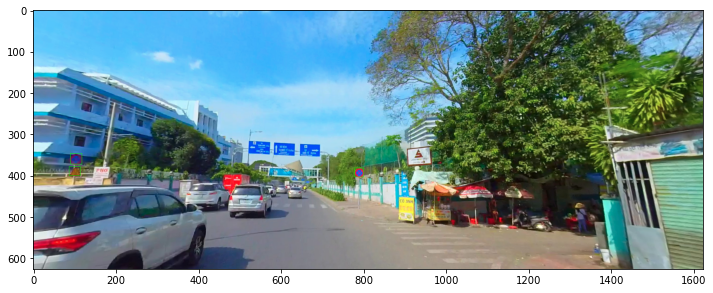

In [245]:
# for i in range(10):
visualize_data(annotations_train, images_train)

In [85]:
os.listdir(data_dir)

['traffic_train', 'traffic_public_test']

In [188]:
def write_images_annotation(annotations, files):
#     files = annotation["images"]
#     annotations = annotation["annotations"]
    
    img_anno_path = "annotation"
    img_anno_dir = os.path.join(data_dir, img_anno_path)
    if not os.path.exists(img_anno_dir):
        os.mkdir(img_anno_dir)
    
    for file in files:
#     file = np.random.choice(files, 1)[0]
        file_name = file["file_name"]
        file_id = file["id"]

        idx = [i for i,fp in enumerate(image_paths) if "/" + file_name in fp][0]
        file_path = image_paths[idx]

        file_annos = [js for i, js in enumerate(annotations) if js["image_id"] == file_id]
        print(file_annos)

        image = cv2.imread(file_path)
        for fan in file_annos:
            x, y, w, h = fan["bbox"]
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)

        image = image[..., ::-1]
        cv2.imwrite(os.path.join(img_anno_dir, "anno_" + file_name), image)

In [189]:
# img = cv2.imread('za_traffic_2020/traffic_train/images/9592.png')

In [190]:
# write_images_annotation(annotation)

## Data Exploration

In [191]:
import sys
import pandas as pd

In [192]:
sys.path.append("EfficientDet")

In [193]:
from collections import Counter

In [194]:
from EfficientDet.generators.coco import CocoGenerator
from pycocotools.coco import COCO

In [195]:
coco = COCO("za_traffic_2020/traffic_train/train_traffic_sign_dataset.json")

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


In [196]:
get_info_annotation(annotation, key="categories")

[{'supercategory': 'Cấm ngược chiều', 'id': 1, 'name': 'Cấm ngược chiều'},
 {'supercategory': 'Cấm dừng và đỗ', 'id': 2, 'name': 'Cấm dừng và đỗ'},
 {'supercategory': 'Cấm rẽ', 'id': 3, 'name': 'Cấm rẽ'},
 {'supercategory': 'Giới hạn tốc độ', 'id': 4, 'name': 'Giới hạn tốc độ'},
 {'supercategory': 'Cấm còn lại', 'id': 5, 'name': 'Cấm còn lại'},
 {'supercategory': 'Nguy hiểm', 'id': 6, 'name': 'Nguy hiểm'},
 {'supercategory': 'Hiệu lệnh', 'id': 7, 'name': 'Hiệu lệnh'}]

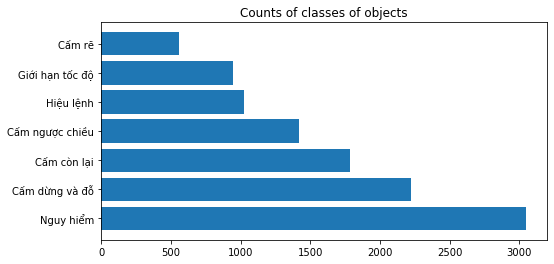

In [197]:
# for image_info in dataset_train.image_info:
#     ann = image_info["annotations"]
class_counts = Counter()

for i in annotation["annotations"]:
    class_counts[i["category_id"]] += 1
    
class_mapping = {i["id"]: i["name"] for i in annotation["categories"]}

class_counts = pd.DataFrame(class_counts.most_common(), columns=["class", "count"])
class_counts["class"] = class_counts["class"].apply(lambda x: class_mapping[x])
plt.figure(figsize=(8, 4))
plt.barh(class_counts['class'], class_counts['count'])
plt.title('Counts of classes of objects');

In [134]:
annotation.keys()

dict_keys(['info', 'images', 'annotations', 'categories'])

In [130]:
info = get_info_annotation(annotation, key="info")

In [175]:
from sklearn.utils import shuffle

In [176]:
images = np.array(get_info_annotation(annotation, key="images"))
images = shuffle(images, random_state=42)

In [135]:
annotations = get_info_annotation(annotation, key="annotations")

In [136]:
categories = get_info_annotation(annotation, key="categories")

In [177]:
images_train = images[:int(0.85*len(images))]
images_test = images[int(0.85*len(images)):]

In [178]:
len(images_train), len(images_test)

(3825, 675)

In [179]:
annotations[0:1]

[{'segmentation': [],
  'area': 342,
  'iscrowd': 0,
  'image_id': 3,
  'bbox': [880, 333, 19, 18],
  'category_id': 2,
  'id': 0}]

In [180]:
def get_annotation_by_image(annotations, images):
    annotations_return = []
    
    image_ids = [image['id'] for image in images]
    for anno in annotations:
        if anno['image_id'] in image_ids:
            annotations_return.append(anno)
            
    return annotations_return

In [181]:
annotations_train = get_annotation_by_image(annotations, images_train)

In [182]:
annotations_test = get_annotation_by_image(annotations, images_test)

In [215]:
len(annotations_test), len(annotations_train)

(1745, 9255)

In [231]:
annotations_train_data = {}

In [232]:
annotations_test_data = {}

In [233]:
annotations_train_data["info"] = info

In [234]:
annotations_train_data["images"] = list(images_train)
annotations_train_data["annotations"] = annotations_train
annotations_train_data["categories"] = categories

In [235]:
with open(json_train_path, "w") as outfile:
    json.dump(annotations_train_data, outfile)

In [236]:
annotations_test_data["info"] = info
annotations_test_data["images"] = list(images_test)
annotations_test_data["annotations"] = annotations_test
annotations_test_data["categories"] = categories

In [237]:
with open(json_test_path, "w") as outfile:
    json.dump(annotations_test_data, outfile)

In [246]:
from EfficientDet.generators.coco import COCO

In [249]:
misc_effect = None
visual_effect = None

In [251]:
# train_generator = CocoGenerator(
#                     data_dir + train_dir,
#                     'train',
#                     misc_effect=misc_effect,
#                     visual_effect=visual_effect,
#                     group_method='random',
#                     **common_args
#                 )

# validation_generator = CocoGenerator(
#                     data_dir + train_dir,
#                     'test',
#                     shuffle_groups=False,
#                     **common_args
#                 )